# Implied Future & Discount From Option Prices

This notebook computes the implied underlying future from option prices of a *single expiry*.

* Computes an **implied forward ** $F$ and a **discount range** $D$ that are **jointly consistent** with the quoted calls & puts.
* Identifies and **excludes the fewest possible strikes** whose quotes prevent any consistent solution (likely stale/misquoted lines).
* Visualizes per-strike **implied futures**.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120

from volkit import implied_future_from_option_prices
from volkit.datasets import spxw

Read a set op example option quotes. Weekly S&P options with 7 days to expiry. Use only quotes that have been trades at least once (min_vol=1)

In [2]:
df = spxw(min_volume=1, D=7)

F,2918.894392
F_bid,2918.846423
F_ask,2918.939470
D,0.999803
D_min,0.99900000
D_max,1.00000000


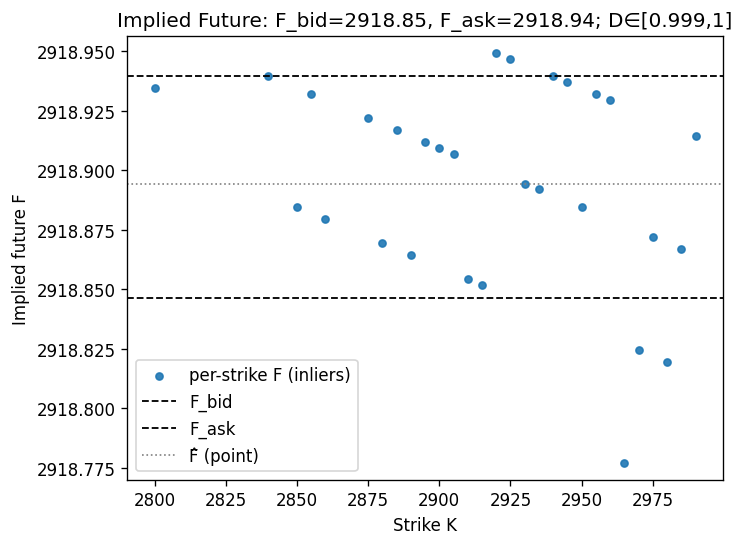

In [3]:
# Compute mid prices
C_mid = (df['C_bid'] + df['C_ask']) / 2
P_mid = (df['P_bid'] + df['P_ask']) / 2

res, valid_mask = implied_future_from_option_prices(
   df['K'], 
   C_mid, 
   P_mid,
   plot=True
)

res